In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import torchvision.models as models

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, shutil
import warnings
warnings.filterwarnings('ignore')

# Ensures inline plotting
%matplotlib inline


In [22]:
folders=os.listdir(r"E:\Projets\Datasets - Pytorch\Pokemon Dataset\Train")
print((folders))

['Aerodactyl', 'Bulbasaur', 'Charmander', 'Dratini', 'Fearow', 'Meowth', 'Pikachu', 'Psyduck', 'Spearow', 'Squirtle']


In [23]:
folder_path = r"E:\Projets\Datasets - Pytorch\Pokemon Dataset"
# this is to make Val folder in directory
if not os.path.isdir(os.path.join(folder_path , 'Val')):
  os.mkdir(os.path.join(folder_path , 'Val'))
directory_contents = os.listdir(folder_path)
print(directory_contents)

['Test', 'Train', 'Val']


In [24]:
# this to make sub folder in Val folder
for c in folders:
  p=os.path.join(r"E:\Projets\Datasets - Pytorch\Pokemon Dataset\Val",c)
  if not os.path.isdir(p):
    os.mkdir(p)

In [25]:
print("for training data:- ")
for f in folders:
  path=os.path.join(r"E:\Projets\Datasets - Pytorch\Pokemon Dataset\Train" , f)
  print(f+ " "+ str(len(os.listdir(path))))

for training data:- 
Aerodactyl 80
Bulbasaur 255
Charmander 264
Dratini 98
Fearow 111
Meowth 63
Pikachu 268
Psyduck 143
Spearow 117
Squirtle 248


In [2]:
# this is to move 10% image from train to val folder
# this is to run once if storage contain images in val then do not run this again as it will decrease the data from train data
Split=0.9

for f in os.listdir(r"E:\Projets\Datasets - Pytorch\Pokemon Dataset\Train"):
  path = os.path.join(r"E:\Projets\Datasets - Pytorch\Pokemon Dataset\Train" , f)
  imgs=os.listdir(path)
  split_size= int(Split*len(imgs))
  file_to_move=imgs[split_size:]
#   print(len(file_to_move))
#   print(file_to_move)

  for img_f in file_to_move:
    src=os.path.join(path,img_f)
    dest=os.path.join(r"E:\Projets\Datasets - Pytorch\Pokemon Dataset\Val" ,f,img_f)
    #print(src)
    #print(dest)
    shutil.move(src,dest)


In [3]:
print("for training data:- ")
for f in folders:
  path=os.path.join(r"E:\Projets\Datasets - Pytorch\Pokemon Dataset\Train" , f)
  print(f+ " "+ str(len(os.listdir(path))))
print("")
print("for vaidation data:- ")

for f in folders:
  path=os.path.join(r"E:\Projets\Datasets - Pytorch\Pokemon Dataset\Val" , f)
  print(f+ " "+ str(len(os.listdir(path))))

for training data:- 


NameError: name 'folders' is not defined

# DataLoader

In [64]:
import torch.utils


test_path = r"E:\Projets\Datasets - Pytorch\Pokemon Dataset\Test"
train_path = r"E:\Projets\Datasets - Pytorch\Pokemon Dataset\Train"
val_path = r"E:\Projets\Datasets - Pytorch\Pokemon Dataset\Val"
data_transforms = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.RandomRotation(20),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])



train_dataset = datasets.ImageFolder(root=train_path, transform=data_transforms)
val_dataset = datasets.ImageFolder(root=val_path, transform=data_transforms)
test_dataset = datasets.ImageFolder(root=test_path, transform=data_transforms)

train_loader = DataLoader(train_dataset , batch_size= 32,shuffle=True)
test_loader = DataLoader(test_dataset , batch_size= 32,shuffle=True)
val_loader = DataLoader(val_dataset , batch_size= 32,shuffle=True)


In [68]:
class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels= 3 , out_channels=64 , kernel_size=11 , stride=4 , padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2 , stride=2 , padding=1)

        self.conv2 = nn.Conv2d(in_channels= 64 , out_channels=128  , kernel_size=11 , stride=1 , padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2 , stride=2 , padding=1)
        
        self.conv3 = nn.Conv2d(in_channels= 128, out_channels=256 , kernel_size=3 , stride=1 , padding=1)
       
        self.conv4 = nn.Conv2d(in_channels= 256 , out_channels= 128 , kernel_size=3 , stride=1 , padding=1)

        self.conv5 = nn.Conv2d(in_channels= 128, out_channels= 128,  kernel_size=11 , stride=4 , padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=2 , stride=2 , padding=1)
        

        self.fc1 = nn.Linear(128 , 512)
        self.drop1 = nn.Dropout(p=0.25)
        self.bn1 = nn.BatchNorm1d(512)

        self.fc2 = nn.Linear(512 ,256)
        self.drop2 = nn.Dropout(p=0.2)
        self.bn2 = nn.BatchNorm1d(256)
        

        self.fc3 = nn.Linear(256 , 128)
        self.drop3= nn.Dropout(p=0.1)
        self.bn3 = nn.BatchNorm1d(128)

        self.output = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)

        x = F.relu(self.conv2(x))
        x = self.pool2(x)

        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))

        x = F.relu(self.conv5(x))
        x = self.pool3(x)

        x = x.view(x.size(0), -1)
        # print(x.shape)

        x = self.bn1(F.relu(self.fc1(x)))
        x = self.drop1(x)

        x = self.bn2(F.relu(self.fc2(x)))
        x = self.drop2(x)


        x = self.bn3(F.relu(self.fc3(x)))
        x = self.drop3(x)

        x = F.softmax(self.output(x))

        return x


def weights_init(m):
    if isinstance(m, nn.Conv2d):
        nn.init.kaiming_normal_(m.weight, nonlinearity='relu')
    elif isinstance(m, nn.Linear):
        nn.init.xavier_normal_(m.weight)

alexModel = AlexNet()

alexModel.apply(weights_init)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(alexModel.parameters() , lr= 0.0001 , weight_decay=1e-4)        


print(alexModel)

AlexNet(
  (conv1): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 128, kernel_size=(11, 11), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(128, 128, kernel_size=(11, 11), stride=(4, 4), padding=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=128, out_features=512, bias=True)
  (drop1): Dropout(p=0.25, inplace=False)
  (bn1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (drop2): Dropout(p=0.2, inplace=False)
  (bn2): BatchNorm1d(256, eps=1e-05, mo

In [69]:
class EarlyStopping:
    def __init__(self,patience=5 , delta=0):
        self.patience = patience
        self.delta = delta
        self.best_score = None
        self.early_stop = False
        self.counter = 0 
        self.best_model_state = None
    
    def __call__(self,val_loss,model):
        score = -val_loss
        if self.best_score is None:
            self.best_score = score
            self.best_model_state = model.state_dict()
        
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True

        else:
            self.best_score = score
            self.best_model_state = model.state_dict()  
            self.counter = 0
        
    def load_best_model(self, model):
        model.load_state_dict(self.best_model_state)
        




In [70]:
if torch.cuda.is_available():
    alexModel.cuda()

# early_stopping = EarlyStopping(patience= 5 , delta= 0.01)
eps = 15


train_losses = []
val_losses = []

train_accuracies = []
val_accuracies = []

for epoch in range(eps):
    train_correct = 0
    train_total = 0
    running_loss = 0

    alexModel.train()

    for image , label in train_loader:
        image , label = image.cuda() , label.cuda()

        optimizer.zero_grad()
        outputs = alexModel(image)

        loss = criterion(outputs , label)
        running_loss += loss.item()

        _,predicted = torch.max(outputs.data , 1)
        train_total += label.size(0)
        train_correct += (predicted == label).sum().item()

        loss.backward()
        optimizer.step()

    
    avg_training_loss = running_loss / len(train_loader)
    train_accuracy = (train_correct / train_total)

    train_losses.append(avg_training_loss)
    train_accuracies.append(train_accuracy)

    val_correct = 0
    val_total = 0
    val_running_loss = 0

    alexModel.eval()

    with torch.no_grad():
        for image, label in val_loader:
            image , label = image.cuda() , label.cuda()

            outputs = alexModel(image)
            loss = criterion(outputs , label)
            val_running_loss = loss.item()

            _,predicted = torch.max(outputs.data , 1)
            val_total += label.size(0)
            val_correct += (predicted == label).sum().item()
            
        
    avg_val_loss = val_running_loss / len(val_loader)
    val_accuracy = (val_correct / val_total)

    val_accuracies.append(val_accuracy)
    val_losses.append(avg_val_loss)

    # early_stopping(avg_val_loss , alexModel)
    # print(early_stopping.best_score)
    # if early_stopping.early_stop:
        
    #     print('Earlt Stopping')
    #     break

    print(f'Epoch: {epoch}, Train Loss: {avg_training_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Val Loss: {avg_val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')

            



Epoch: 0, Train Loss: 2.2766, Train Accuracy: 0.16%, Val Loss: 0.2276, Val Accuracy: 0.12%
Epoch: 1, Train Loss: 2.1984, Train Accuracy: 0.28%, Val Loss: 0.2187, Val Accuracy: 0.24%
Epoch: 2, Train Loss: 2.0846, Train Accuracy: 0.41%, Val Loss: 0.2069, Val Accuracy: 0.44%
Epoch: 3, Train Loss: 2.0141, Train Accuracy: 0.47%, Val Loss: 0.1936, Val Accuracy: 0.47%
Epoch: 4, Train Loss: 2.0184, Train Accuracy: 0.47%, Val Loss: 0.2066, Val Accuracy: 0.43%
Epoch: 5, Train Loss: 2.0155, Train Accuracy: 0.46%, Val Loss: 0.2002, Val Accuracy: 0.50%
Epoch: 6, Train Loss: 1.9860, Train Accuracy: 0.49%, Val Loss: 0.2097, Val Accuracy: 0.38%
Epoch: 7, Train Loss: 1.9696, Train Accuracy: 0.51%, Val Loss: 0.1858, Val Accuracy: 0.51%
Epoch: 8, Train Loss: 1.9306, Train Accuracy: 0.55%, Val Loss: 0.1988, Val Accuracy: 0.54%
Epoch: 9, Train Loss: 1.9166, Train Accuracy: 0.56%, Val Loss: 0.1969, Val Accuracy: 0.55%
Epoch: 10, Train Loss: 1.9054, Train Accuracy: 0.57%, Val Loss: 0.1847, Val Accuracy: 0.56

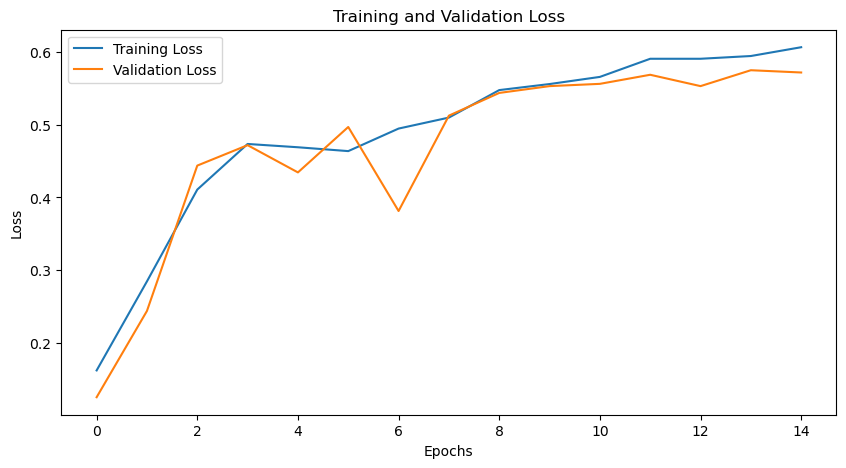

In [76]:

plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Training Loss')
plt.plot(val_accuracies, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

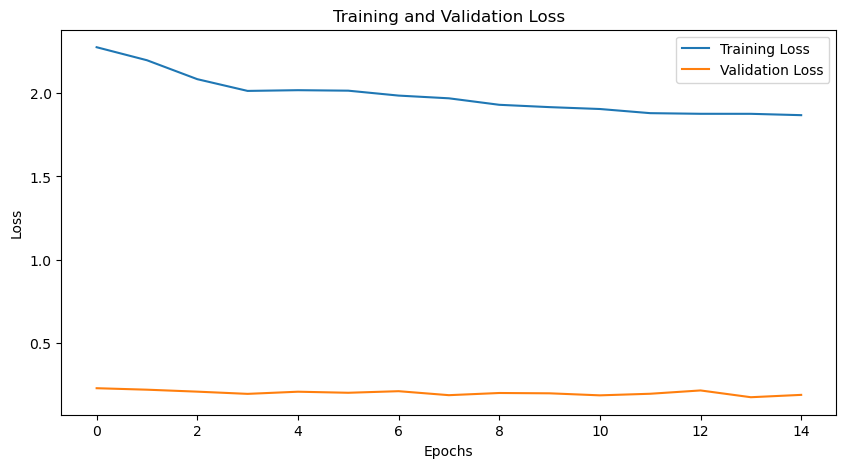

In [77]:
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

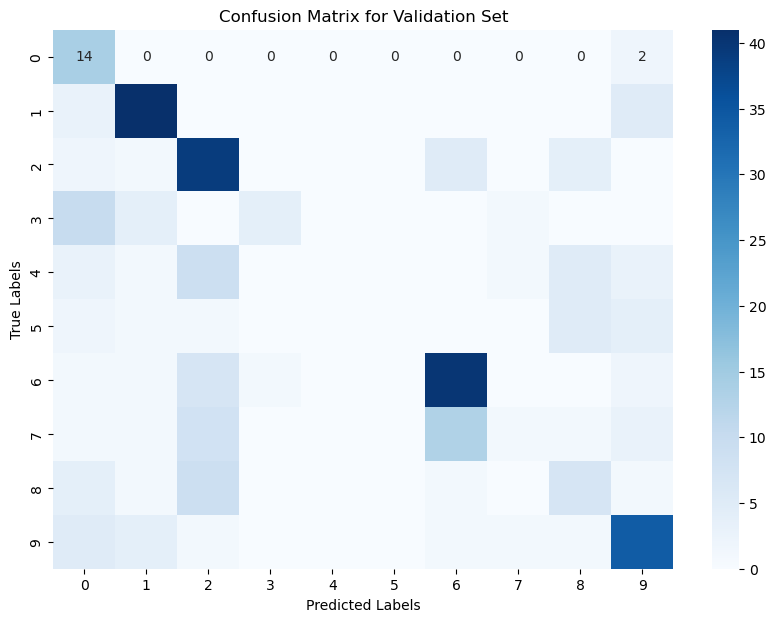

In [78]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize lists to store predictions and actual labels
all_preds = []
all_labels = []

# Switch model to evaluation mode
alexModel.eval()
with torch.no_grad():
    for image, label in val_loader:
        if torch.cuda.is_available():
            image, label = image.cuda(), label.cuda()
        
        # Get model output
        outputs = alexModel(image)
        
        # Get predicted classes
        _, predicted = torch.max(outputs.data, 1)
        
        # Store predictions and actual labels
        all_preds.extend(predicted.cpu().numpy())  # Move to CPU and convert to numpy
        all_labels.extend(label.cpu().numpy())  # Move to CPU and convert to numpy

# Create confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot confusion matrix using seaborn for better visualization
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Validation Set')
plt.show()


In [79]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score

f1 = f1_score(all_labels, all_preds, average='weighted')  
precision = precision_score(all_labels, all_preds, average='weighted') 
recall = recall_score(all_labels, all_preds, average='weighted')  

print(f'F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}')


F1 Score: 0.5052, Precision: 0.5058, Recall: 0.5625


In [80]:
test_predictions = []

alexModel.eval()
with torch.no_grad():
    for batch in test_loader:  # Expecting that batch is a list or tuple
        image = batch[0]  # Extract the image from the list

        if torch.cuda.is_available():
            image = image.cuda()

        # Get model output (logits or softmax probabilities)
        outputs = alexModel(image)

        # Get predicted classes
        _, predicted = torch.max(outputs.data, 1)

        # Save predictions in the list
        test_predictions.extend(predicted.cpu().numpy())  # Move to CPU and convert to numpy array

# Now `test_predictions` contains the predicted class for each test sample
print(test_predictions)


[1, 8, 9, 6, 1, 0, 3, 2, 2, 1, 1, 9, 1, 6, 2, 2, 1, 2, 2, 2, 6, 2, 9, 2, 2, 6, 3, 8, 1, 1, 2, 6, 2, 0, 8, 2, 8, 2, 7, 2, 0, 0, 2, 1, 0, 2, 6, 6, 2, 6, 7, 2, 0, 9, 9, 7, 9, 6, 2, 8, 2, 3, 0, 0, 9, 2, 8, 2, 2, 1, 9, 6, 6, 1, 1, 0, 2, 2, 2, 6, 2, 8, 8, 1, 1, 6, 1, 7, 9, 1, 8, 2, 1, 1, 8, 9, 1, 2, 1, 9, 0, 2, 2, 9, 9, 1, 1, 1, 6, 1, 1, 2, 8, 1, 6, 2, 2, 9, 6, 9, 2, 9, 8, 0, 0, 8, 0, 1, 0, 0, 9, 6, 8, 0, 0, 0, 9, 2, 1, 0, 2, 0, 9, 0, 8, 6, 9, 2, 1, 1, 2, 9, 2, 0, 0, 9, 1, 6, 9, 2, 9, 2, 9, 8, 3, 0, 6, 1, 1, 3, 7, 8, 8, 6, 2, 0, 1, 0, 2, 6, 2, 3, 1, 2, 2, 1, 6]
